<a href="https://colab.research.google.com/github/sayarghoshroy/Extending_K-means/blob/master/K_means_Objective_vs_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

In [0]:
warnings.filterwarnings('ignore')

In [3]:
all_points = open('points.txt', 'r+').read().split('\n')
points = [[p.split(",")[0], p.split(",")[0]] for p in all_points]
_ = points.pop()
points = np.array(points).astype('float')
print("Number of Points = " + str(points.shape[0]))

Number of Points = 100


In [0]:
def dist(X, Y):
    distance = (np.dot((X - Y), (X - Y)))
    return distance

def score(centres, pred):
    sum = 0
    for i in range(100):
        sum += dist(points[i, :], centres[pred[i], :])
    return sum

def normalized_score(centres, pred, K):
    return (score(centres, pred) / K)

In [0]:
scores = []
normalized_scores = []

for k in range(1, 101):
    model = KMeans(n_clusters = k, random_state = 0).fit(points)
    pred = model.predict(points)
    centres = model.cluster_centers_

    scores.append(score(centres, pred))
    normalized_scores.append(normalized_score(centres, pred, k))

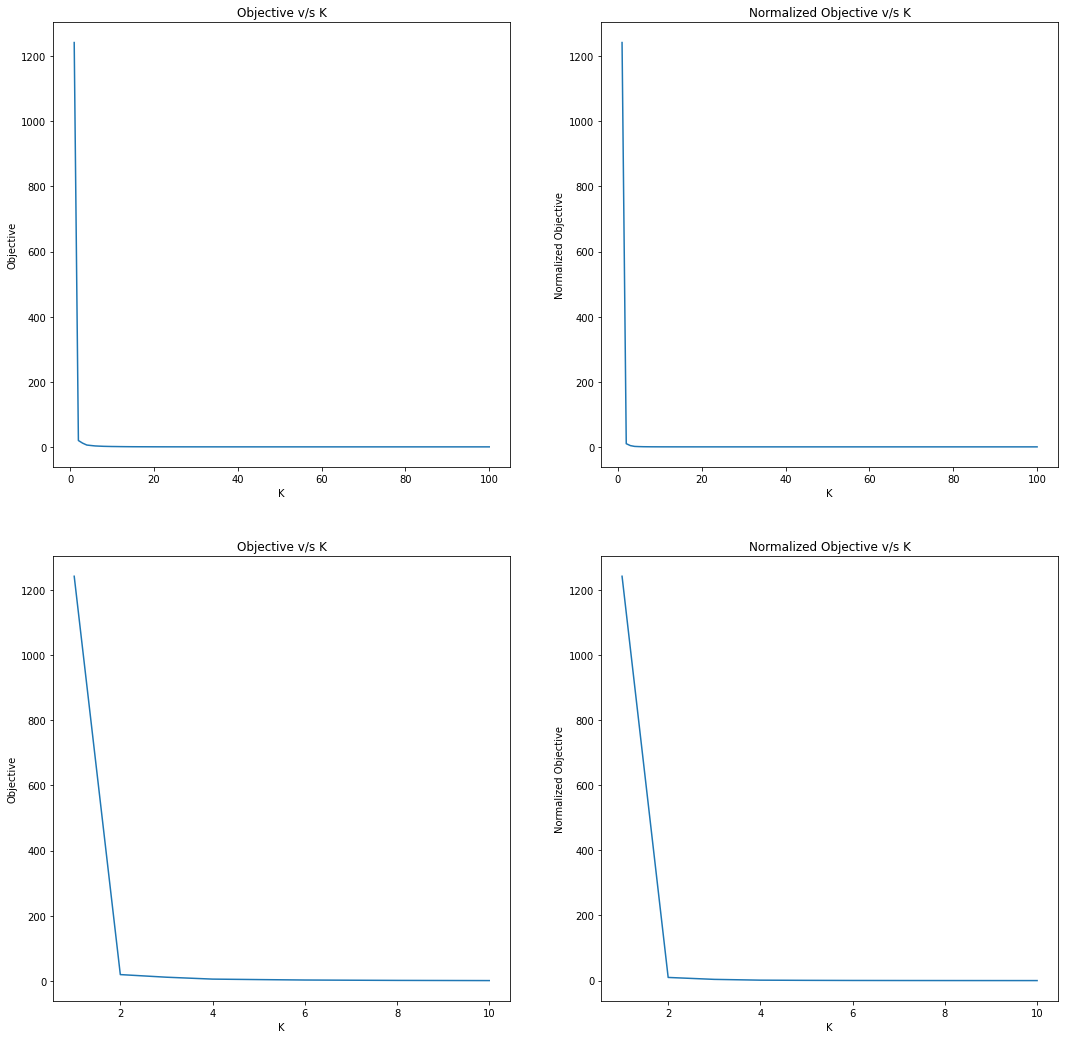

In [6]:
plt.figure(figsize=(18, 18))

a = plt.subplot(221)
a.set_title("Objective v/s K")
a.set_xlabel("K")
a.set_ylabel("Objective")
a.plot([i for i in range(1, 101)], scores)

b = plt.subplot(222)
b.set_title("Normalized Objective v/s K")
b.set_xlabel("K")
b.set_ylabel("Normalized Objective")
b.plot([i for i in range(1, 101)], normalized_scores)

c = plt.subplot(223)
c.set_title("Objective v/s K")
c.set_xlabel("K")
c.set_ylabel("Objective")
c.plot([i for i in range(1, 11)], scores[:10])

d = plt.subplot(224)
d.set_title("Normalized Objective v/s K")
d.set_xlabel("K")
d.set_ylabel("Normalized Objective")
d.plot([i for i in range(1, 11)], normalized_scores[:10])

plt.show()

In [0]:
# ^_^ Thank You